In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import sys

#### Here we are changing current working directory to main directory of the project and updating sys.path

In [17]:
%cd ..

/home/artem/Desktop/programming/data_analysis/digits


In [22]:
s = !pwd
s = s[0]

In [23]:
s

'/home/artem/Desktop/programming/data_analysis/digits'

In [24]:
sys.path.pop(0)
sys.path.insert(0, s)

In [25]:
sys.path

['/home/artem/Desktop/programming/data_analysis/digits',
 '/home/artem/anaconda3/lib/python38.zip',
 '/home/artem/anaconda3/lib/python3.8',
 '/home/artem/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/artem/anaconda3/lib/python3.8/site-packages',
 '/home/artem/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/artem/.ipython']

#### running preprocessing from my project

In [50]:
%run preprocessing.py

In [69]:
import preprocessing

Here you'll find where this library is located

In [68]:
print(preprocessing)

<module 'preprocessing' from '/home/artem/Desktop/programming/data_analysis/digits/preprocessing.py'>


In [51]:
df

,B,C,D,E,F,G,H
0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0
2,0,1,1,1,0,1,0
3,1,1,1,1,1,0,0
4,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...
495,1,1,0,1,0,1,1
496,1,0,1,1,1,1,0
497,0,0,1,1,1,0,0
498,1,1,1,0,0,1,0


#### Training of Kmeans clusterization algorithm for different number of clusters

In [52]:
models = [KMeans(n_clusters=k).fit(df) for k in range(1, 21)]
dist = [models[i].inertia_ for i in range(20)]

Text(0.5, 1.0, 'Elbow')

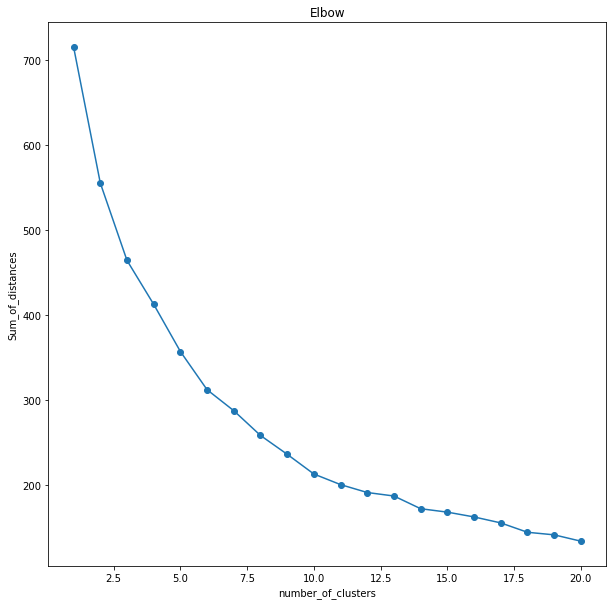

In [53]:
plt.figure(figsize=(10,10))
plt.plot(range(1, 21), dist, marker='o')
plt.xlabel('number_of_clusters')
plt.ylabel('Sum_of_distances')
plt.title('Elbow')

In my point of view rapid growth starts from 3 clusters 

In [61]:
model = KMeans(n_clusters=3)
model.fit(df)

KMeans(n_clusters=3)

In [62]:
df['cluster'] = model.labels_

In [63]:
df.groupby(['cluster']).mean()

,B,C,D,E,F,G,H
cluster,,,,,,,
0,0.877193,0.00000,0.859649,0.947368,0.859649,0.175439,0.877193
1,0.376812,0.34058,0.898551,0.384058,0.137681,0.913043,0.079710
2,0.895082,0.82623,0.622951,0.839344,0.465574,0.918033,0.895082


Here It can be seen that
* 0th cluster looks most like 1, but can as well be 7
* 1st cluster looks like 5, but can as well be 6
* 2nd cluster looks like 2

Though the reason why I firstly didn't want to analyze clusters at all: Because, if we are solving the probllem of classification it is pointless to divide digits to any number of clusters less than 10